In [5]:
!pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


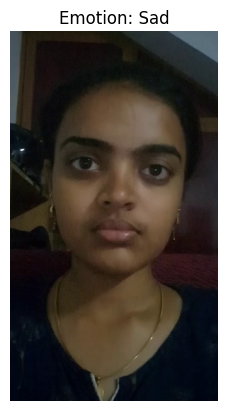

In [1]:
import tkinter as tk
from tkinter import filedialog
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

def preprocess_input(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    img = cv2.resize(img, (48, 48))  
    img = img.astype('float32') / 255.0  
    img = np.expand_dims(img, axis=0)  
    img = np.expand_dims(img, axis=-1)  
    return img


def predict_emotion(image):
    processed_image = preprocess_input(image)
    predictions = model.predict(processed_image)
    max_index = np.argmax(predictions[0])
    predicted_emotion = emotion_labels[max_index]
    return predicted_emotion

def process_video():
    file_path = filedialog.askopenfilename()
    video_capture = cv2.VideoCapture(file_path)
    fps = video_capture.get(cv2.CAP_PROP_FPS)
    frame_interval = int(fps * 2) 
    frames = []
    emotions = []
    frame_count = 0
    max_frames = 5
    
    while True:
        ret, frame = video_capture.read()
        if not ret or frame_count >= max_frames:
            break
        if frame_count % frame_interval == 0:
            emotion = predict_emotion(frame)
            frames.append(frame)
            emotions.append(emotion)
        frame_count += 1

    video_capture.release()
    
    for frame, emotion in zip(frames, emotions):
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
        plt.title(f'Emotion: {emotion}')
        plt.axis('off')
        plt.show()

model = load_model('emotion_model.h5')
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

root = tk.Tk()
root.title("Video Emotion Detection")

select_video_button = tk.Button(root, text="Select Video", command=process_video)
select_video_button.pack(pady=20)

root.mainloop()
